<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/CNN_4_Digit_Recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-1: Installation & Setup

In [ ]:
# Install TensorFlow
"""
!pip install -q tensorflow-gpu

- Command executed on cmd
"""

'\n!pip install -q tensorflow-gpu\n\n- Command executed on cmd\n'

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.12.0


# Step-2: Data Preprocessing

## Data and Library Importation

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset from Tendsorflow

In [ ]:
from tensorflow.keras.datasets import mnist

Dataset Loading

In [ ]:
# creating 2 Tuples

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Data Exploration

Index Image Check @ Random

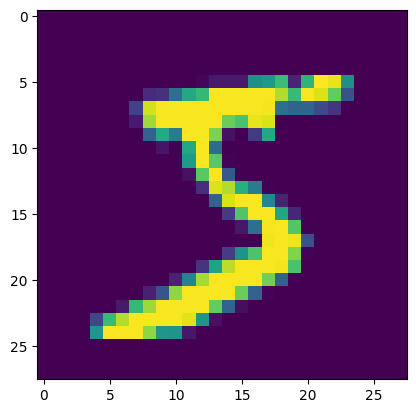

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
# View shape

x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

Statistical Properties

In [ ]:
x_train.std(), x_train.mean(), x_train.min(), x_train.max()

(78.56748998339798, 33.318421449829934, 0, 255)

In [ ]:
y_train.std(), y_train.mean(), y_train.min(), y_train.max()

(2.889246360020012, 4.4539333333333335, 0, 9)

## Dataset Normalization

In [ ]:
"""
Normalizato\ion is required to process data faster
"""
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# View Min & Max Values

x_train.min(), x_train.max()

(0.0, 1.0)

## Image Reshaping

In [ ]:
# Preview Shape

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
"""
Images are in 2-D but the CNN requires 3-D

"""

'\nImages are in 2-D but the CNN requires 3-D\n\n'

In [ ]:
# Re-shaping

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
# Check new shape

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Define a Variable, "input_shape"

In [ ]:
input_shape = x_train[0].shape

In [ ]:
print(input_shape)

(28, 28, 1)


# Step-3: Model Building

Define an Object

In [ ]:
# CNN initialazation

model = tf.keras.Sequential()

## CNN Layers Creation

In [ ]:
# Adding 1st CNN Layer
"""
1. Filters (kernel) = 32
2. kernel_size = (3,3)
3. Activation function = relu
4. input_shape = (28,28,1)
"""

model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= (3,3), activation= "relu", input_shape= (28,28,1)))

In [ ]:
# Adding 2nd CNN Layer
"""
1. Filters (kernel) = 64
2. kernel_size = (3,3)
3. Activation function = relu
"""

model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= (3,3), activation= "relu"))

In [ ]:
# Adding the maxpool Layer // Extract the dominant features and reduces the size of CNN features.

model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))

In [ ]:
# Adding Dropout Layer // Regularization Technique preventing overfitting

model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Adding the flatten Layer

model.add(tf.keras.layers.Flatten())

In [ ]:
# Add the fully Connected Layer (Dense Layer)

model.add(tf.keras.layers.Dense(units= 128, activation= "relu"))

In [ ]:
# Add the output layer

model.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))

Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

## Model Compliation

In [ ]:
model.compile(optimizer= "adam", loss= "sparse_categorical_crossentropy", metrics= ["sparse_categorical_accuracy"])

# Step-4: Model Training

In [ ]:
history = model.fit(x_train, y_train, batch_size= 128, epochs= 10, validation_data= (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 196s 411ms/step - loss: 0.1678 - sparse_categorical_accuracy: 0.9505 - val_loss: 0.0473 - val_sparse_categorical_accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 180s 383ms/step - loss: 0.0544 - sparse_categorical_accuracy: 0.9832 - val_loss: 0.0377 - val_sparse_categorical_accuracy: 0.9869
Epoch 3/10
469/469 [==============================] - 184s 392ms/step - loss: 0.0364 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0349 - val_sparse_categorical_accuracy: 0.9868
Epoch 4/10
469/469 [==============================] - 183s 390ms/step - loss: 0.0267 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0285 - val_sparse_categorical_accuracy: 0.9910
Epoch 5/10
469/469 [==============================] - 178s 379ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9923 - val_loss: 0.0287 - val_sparse_categorical_accuracy: 0.9905
Epoch 6/10
469/469 [==============================] - 179s 382ms/step - loss: 0.

## Model Prediction


In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = y_pred_prob.argmax(axis=-1)


313/313 [==============================] - 9s 28ms/step


Single Object Prediction

In [ ]:
y_pred[3], y_test[3]

(0, 0)

In [ ]:
y_pred[15], y_test[15]

(5, 5)

## Confusion Matrix


In [ ]:
"""
# Confusion Matrix

conf_m = confusion_matrix(y_test, y_pred_classes)
print(conf_m)

# Confusion Matrix Visual

import seaborn as sns
from sklearn.metrics import confusion_matrix

# create the confusion matrix
conf_m = confusion_matrix(y_test, y_pred)

# plot the matrix
sns.heatmap(conf_m, annot=True, cmap='Blues')

# add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label') """

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# create the confusion matrix
conf_m = confusion_matrix(y_test, y_pred)

In [ ]:
conf_m

array([[ 976,    0,    1,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1133,    0,    0,    0,    1,    1,    0,    0,    0],
       [   1,    2, 1025,    1,    0,    0,    0,    3,    0,    0],
       [   0,    1,    1, 1002,    0,    5,    0,    0,    1,    0],
       [   0,    0,    0,    0,  974,    0,    2,    0,    0,    6],
       [   0,    0,    1,    5,    0,  885,    1,    0,    0,    0],
       [   4,    5,    0,    0,    2,    1,  944,    0,    2,    0],
       [   0,    4,    4,    0,    0,    0,    0, 1019,    1,    0],
       [   3,    0,    4,    1,    0,    0,    1,    0,  963,    2],
       [   0,    1,    0,    0,    4,    1,    0,    5,    1,  997]])

In [ ]:
# Evaluate the performance

acc = accuracy_score(y_test, y_pred)
print(acc*100,"%")

99.18 %


# Step-5: Learning Curve

## Training VS Validation Accuracy & Loss Values

In [ ]:
def learning_curve(history, epoch):


    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
    plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


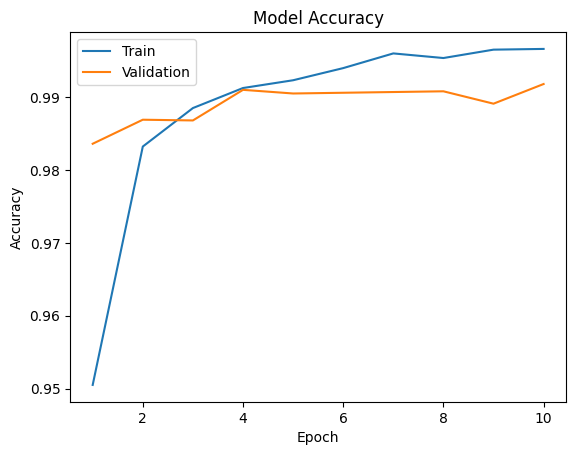

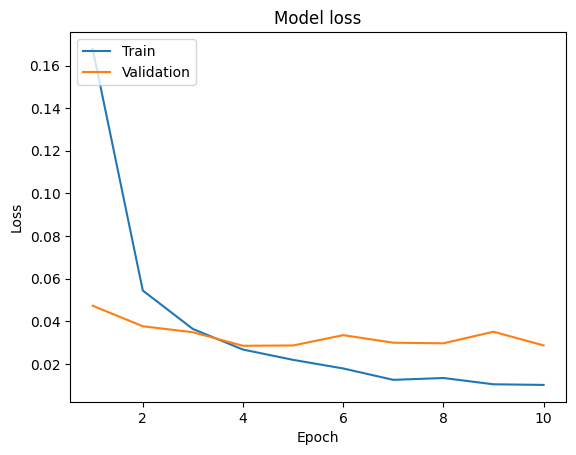

In [ ]:
learning_curve(history, 10)